In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_possession = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'
url_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'

In [4]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,1043,...,44.4,2,1.4,+0.6,19,48,36,8,92,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,1239,...,61.1,0,0.3,-0.3,7,77,6,0,87,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,1532,...,86.0,0,1.1,-1.1,15,77,13,1,81,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,1282,...,66.6,2,2.8,-0.8,28,121,17,6,126,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,2,...,NaN,0,0.0,0.0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2886,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,1174,...,69.9,1,1.0,0.0,15,113,10,1,97,Matches
3001,2887,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,704,...,61.4,2,1.5,+0.5,19,51,19,3,65,Matches
3002,2888,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,1253,...,68.1,4,6.3,-2.3,68,91,61,3,140,Matches
3003,2889,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,408,...,64.3,4,2.8,+1.2,29,18,4,0,30,Matches


In [5]:
data_possession = pd.read_html(url_possession, header=1)[0]
data_possession = data_possession[data_possession['Player'] != 'Player']
data_possession

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,...,Prog,1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,1793,...,161,50,12,26,31,1107,992,89.6,40,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,1843,...,90,23,0,14,13,1194,1160,97.2,12,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,1930,...,78,20,4,23,40,1605,1484,92.5,47,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,1948,...,92,37,3,28,46,1452,1350,93.0,56,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,12,...,0,1,0,4,0,12,8,66.7,2,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2886,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,1643,...,99,29,0,17,9,1143,1106,96.8,22,Matches
3001,2887,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,1275,...,159,56,6,52,58,965,834,86.4,84,Matches
3002,2888,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,1737,...,179,56,10,41,47,1481,1295,87.4,109,Matches
3003,2889,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,871,...,13,4,4,46,27,1097,711,64.8,115,Matches


In [6]:
data_defence = pd.read_html(url_defence, header=1)[0]
data_defence = data_defence[data_defence['Player'] != 'Player']
data_defence

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,68,...,39,85,21,0,64,54,122,69,0,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,59,...,28,61,26,2,35,103,162,104,0,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,55,...,108,27,1,0,26,51,106,15,0,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,114,...,103,52,3,0,49,84,198,11,0,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,0,...,3,1,0,0,1,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2886,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,58,...,44,37,14,0,23,49,107,61,0,Matches
3001,2887,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,68,...,112,49,8,0,41,53,121,27,2,Matches
3002,2888,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,40,...,195,17,1,0,16,20,60,11,1,Matches
3003,2889,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,6,...,135,10,3,0,7,2,8,34,0,Matches


In [7]:
d1 = data_passing[['Player', 'Pos', '90s', 'Prog', 'KP', 'PPA', 'CrsPA']]
d2 = data_possession[['Player', 'Touches', 'Prog', 'Succ']]
d3 = data_defence[['Player', 'TklW', 'Succ', 'Blocks', 'Int', 'Clr']]
d = pd.DataFrame(columns=['Player', '90s', 'Touches', 'Prog Passes', 'Key Passes', 'PPA', 'CrsPA', 'DribblesS', 'Prog Carries', 'TklW', 'PressureS', 'Blocks', 'Int', 'Clr'])
d['Player'] = d1['Player']
d['90s'] = d1['90s']
d['Touches'] = d2['Touches']
d['Prog Passes'] = d1['Prog']
d['Key Passes'] = d1['KP']
d['PPA'] = d1['PPA']
d['CrsPA'] = d1['CrsPA']
d['DribblesS'] = d2['Succ']
d['Prog Carries'] = d2['Prog']
d['TklW'] = d3['TklW']
d['PressureS'] = d3['Succ']
d['Blocks'] = d3['Blocks']
d['Int'] = d3['Int']
d['Clr'] = d3['Clr']
d.iloc[:, 1:] = d.iloc[:, 1:].astype(float)
d

,Player,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr
0,Max Aarons,31.0,1793.0,92.0,19.0,36.0,8.0,31.0,161.0,37.0,112.0,85.0,54.0,69.0
1,Yunis Abdelhamid,32.1,1843.0,87.0,7.0,6.0,0.0,15.0,90.0,44.0,156.0,61.0,103.0,104.0
2,Salis Abdul Samed,27.4,1930.0,81.0,15.0,13.0,1.0,27.0,78.0,34.0,179.0,27.0,51.0,15.0
3,Laurent Abergel,31.9,1948.0,126.0,28.0,17.0,6.0,42.0,92.0,72.0,255.0,52.0,84.0,11.0
4,Charles Abi,0.5,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,Martín Zubimendi,27.8,1643.0,97.0,15.0,10.0,1.0,10.0,99.0,30.0,123.0,37.0,49.0,61.0
3001,Szymon Żurkowski,24.6,1275.0,65.0,19.0,19.0,3.0,25.0,159.0,46.0,133.0,49.0,53.0,27.0
3002,Martin Ødegaard,28.9,1737.0,140.0,68.0,61.0,3.0,19.0,179.0,23.0,143.0,17.0,20.0,11.0
3003,Milan Đurić,23.1,871.0,30.0,29.0,4.0,0.0,10.0,13.0,4.0,55.0,10.0,2.0,34.0


In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries'] + data['Key Passes'] + data['PPA'] + data['CrsPA']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Defensive Midfield', 'Central Midfield']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
1,7,Laurent Abergel,Defensive Midfield,31.9,1948.0,126.0,28.0,17.0,6.0,42.0,92.0,72.0,255.0,52.0,84.0,11.0,311.0,474.0,9.749216,14.858934
9,19,Tyler Adams,Defensive Midfield,15.0,1065.0,62.0,8.0,10.0,0.0,10.0,76.0,16.0,104.0,32.0,23.0,20.0,166.0,195.0,11.066667,13.0
13,27,Lucien Agoume,Defensive Midfield,20.8,1198.0,78.0,11.0,11.0,0.0,20.0,53.0,42.0,121.0,38.0,56.0,32.0,173.0,289.0,8.317308,13.894231
19,37,Jean-Eudes Aholou,Defensive Midfield,10.4,510.0,27.0,6.0,8.0,1.0,12.0,39.0,10.0,43.0,8.0,22.0,11.0,93.0,94.0,8.942308,9.038462
28,48,Paul Akouokou,Central Midfield,5.7,380.0,28.0,3.0,2.0,0.0,6.0,17.0,12.0,38.0,7.0,12.0,9.0,56.0,78.0,9.824561,13.684211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,2795,Andre-Frank Zambo Anguissa,Defensive Midfield,21.3,1480.0,91.0,23.0,17.0,2.0,32.0,108.0,34.0,150.0,28.0,43.0,26.0,273.0,281.0,12.816901,13.192488
1995,2801,Oier Zarraga,Central Midfield,12.5,612.0,58.0,5.0,9.0,0.0,6.0,53.0,7.0,44.0,19.0,17.0,7.0,131.0,94.0,10.48,7.52
2003,2810,Piotr Zieliński,Central Midfield,22.4,1309.0,91.0,49.0,37.0,7.0,21.0,108.0,14.0,95.0,25.0,14.0,3.0,313.0,151.0,13.973214,6.741071
2008,2818,Igor Zubeldia,Defensive Midfield,18.3,1193.0,42.0,1.0,4.0,2.0,2.0,39.0,15.0,48.0,27.0,30.0,63.0,90.0,183.0,4.918033,10.0


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

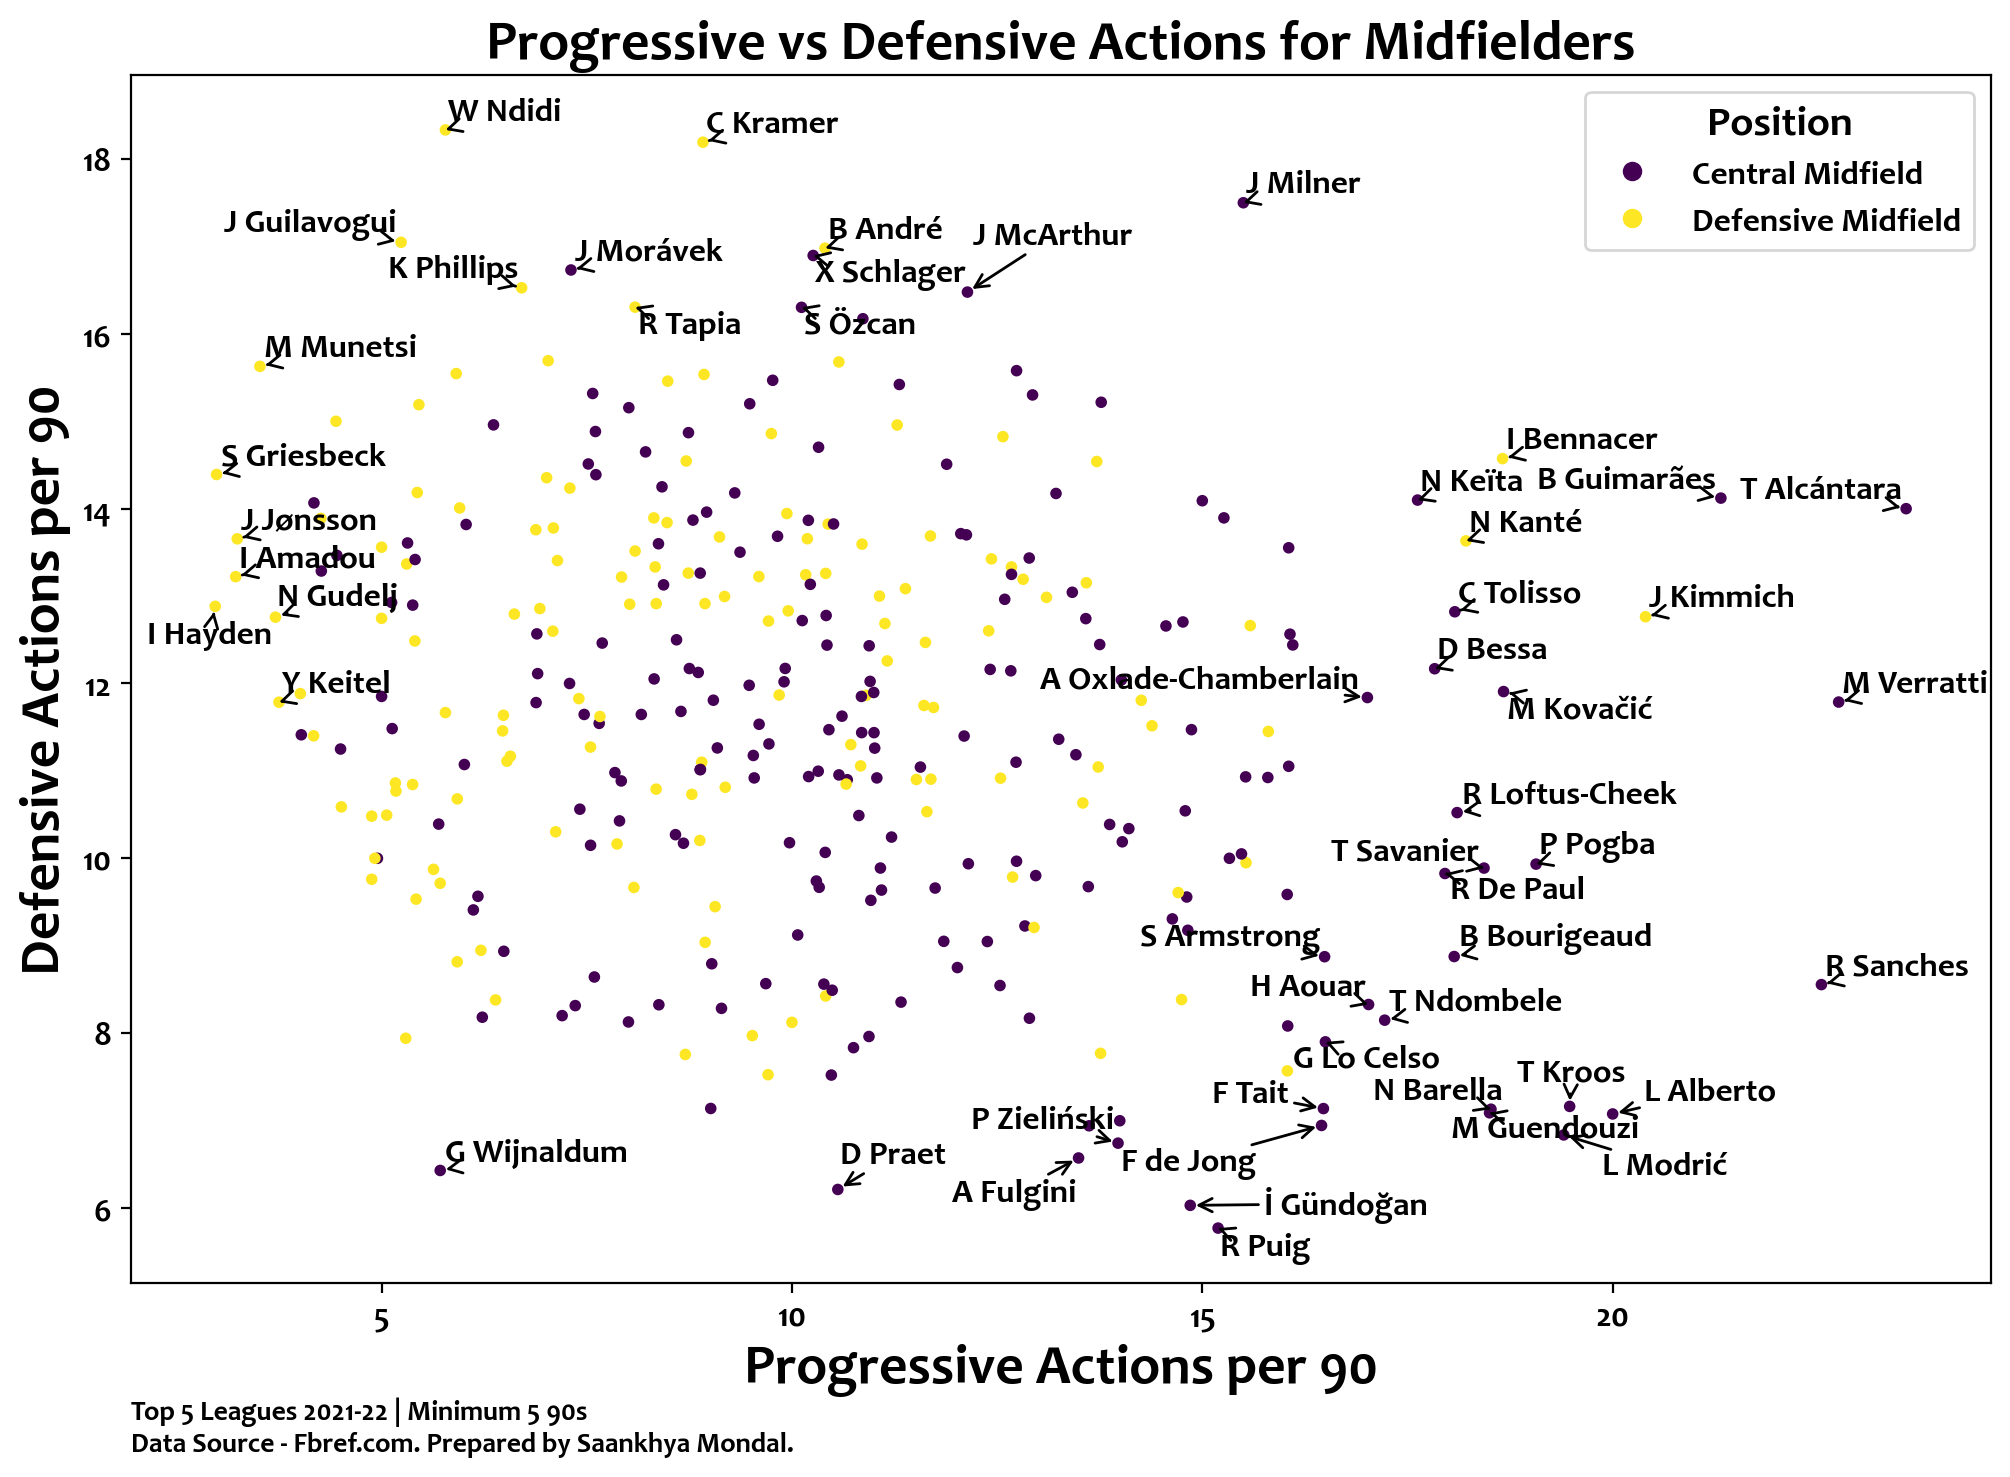

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['DAp90'].astype(float).quantile(0.97)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.92)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Midfielders', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=['Central Midfield', 'Defensive Midfield'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [11]:
fig.savefig('Images/PAp90vDAp90_CM_DM.png', dpi=400, bbox_inches='tight')

In [12]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries'] + data['Key Passes'] + data['PPA'] + data['CrsPA']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
7,17,Marcos Acuña,Left-Back,24.1,2018.0,115.0,40.0,40.0,22.0,42.0,147.0,38.0,90.0,30.0,30.0,29.0,406.0,217.0,16.846473,9.004149
12,26,Martin Agirregabiria,Right-Back,17.3,947.0,55.0,13.0,18.0,10.0,14.0,45.0,22.0,57.0,29.0,25.0,44.0,155.0,177.0,8.959538,10.231214
17,32,Ruben Aguilar,Right-Back,22.8,1955.0,152.0,12.0,34.0,6.0,9.0,150.0,50.0,134.0,36.0,58.0,61.0,363.0,339.0,15.921053,14.868421
21,39,Ola Aina,Right-Back,15.0,913.0,60.0,15.0,20.0,5.0,15.0,77.0,12.0,51.0,23.0,32.0,32.0,192.0,150.0,12.8,10.0
22,41,Rayan Aït Nouri,Left-Back,19.3,1214.0,42.0,17.0,15.0,9.0,39.0,112.0,41.0,130.0,32.0,34.0,32.0,234.0,269.0,12.124352,13.937824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2799,Gabriele Zappa,Right-Back,12.7,752.0,33.0,8.0,7.0,6.0,7.0,50.0,12.0,60.0,26.0,23.0,16.0,111.0,137.0,8.740157,10.787402
1994,2800,Davide Zappacosta,Right-Back,25.2,1696.0,98.0,34.0,38.0,20.0,17.0,156.0,16.0,107.0,53.0,21.0,17.0,363.0,214.0,14.404762,8.492063
1997,2803,Deyovaisio Zeefuik,Right-Back,6.3,339.0,20.0,4.0,5.0,1.0,2.0,23.0,7.0,28.0,17.0,12.0,17.0,55.0,81.0,8.730159,12.857143
1998,2804,Marvin Zeegelaar,Left-Back,7.1,376.0,18.0,2.0,1.0,0.0,8.0,20.0,17.0,38.0,14.0,21.0,18.0,49.0,108.0,6.901408,15.211268


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

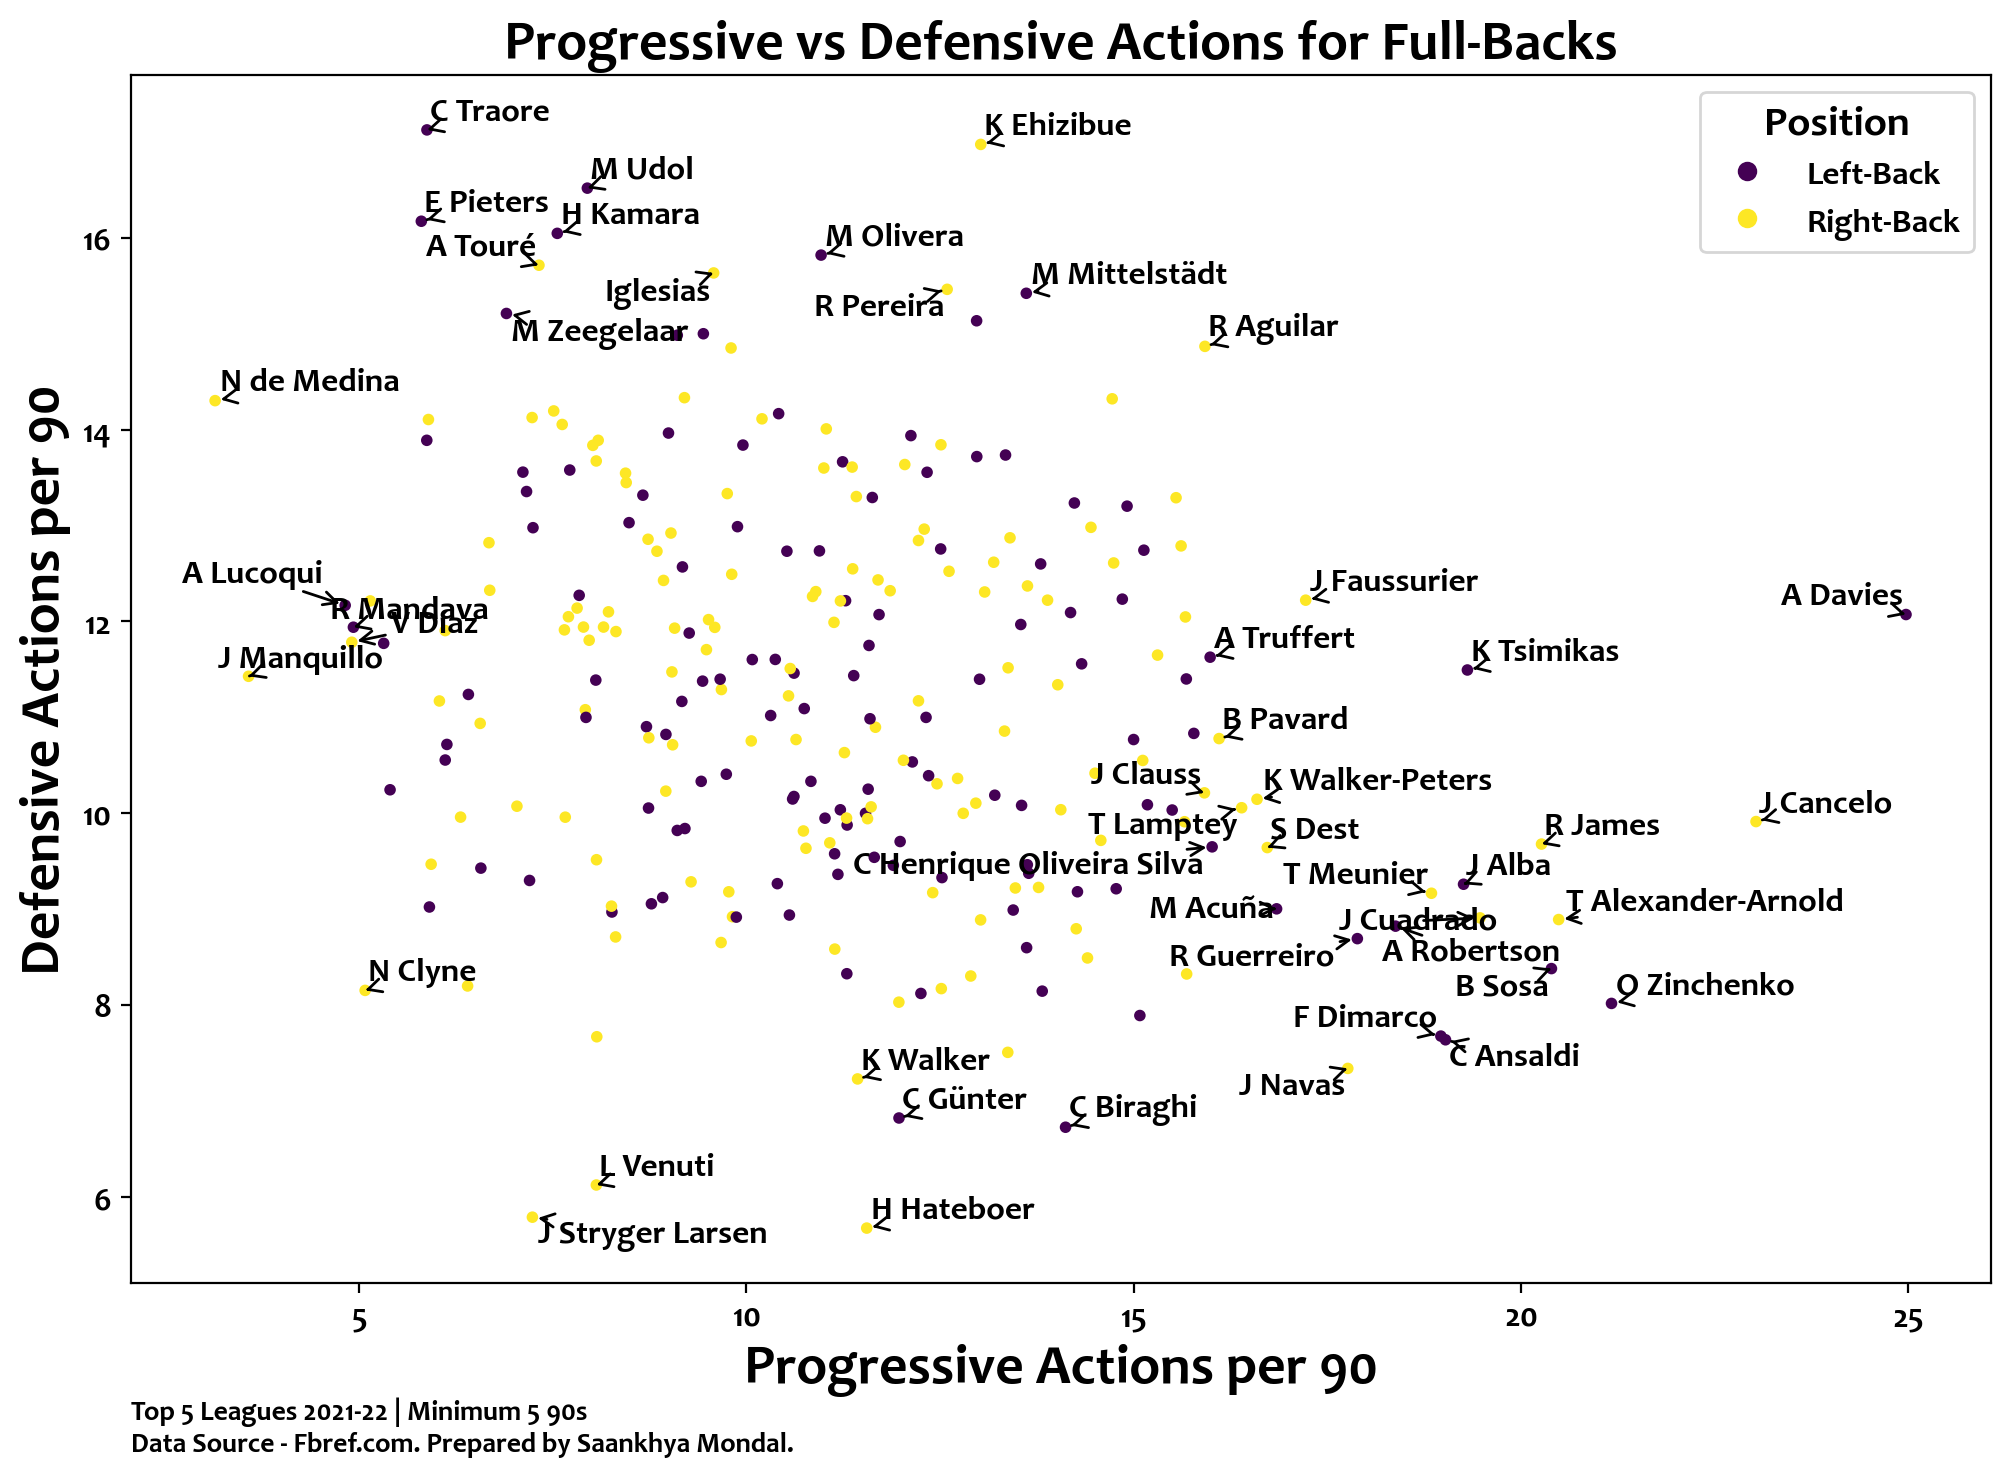

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['DAp90'].astype(float).quantile(0.96)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.91)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [14]:
fig.savefig('Images/PAp90vDAp90_FB.png', dpi=400, bbox_inches='tight')

In [15]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries'] + data['Key Passes'] + data['PPA'] + data['CrsPA']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Centre-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
0,4,Yunis Abdelhamid,Centre-Back,32.1,1843.0,87.0,7.0,6.0,0.0,15.0,90.0,44.0,156.0,61.0,103.0,104.0,205.0,468.0,6.386293,14.579439
5,15,Francesco Acerbi,Centre-Back,26.2,2139.0,86.0,6.0,6.0,0.0,3.0,93.0,10.0,46.0,48.0,47.0,112.0,194.0,263.0,7.40458,10.038168
15,30,Nayef Aguerd,Centre-Back,29.4,2388.0,86.0,3.0,2.0,0.0,5.0,74.0,12.0,65.0,28.0,52.0,148.0,170.0,305.0,5.782313,10.37415
20,38,Joseph Aidoo,Centre-Back,28.3,1774.0,98.0,3.0,7.0,1.0,8.0,105.0,40.0,121.0,48.0,53.0,124.0,222.0,386.0,7.844523,13.639576
24,44,Manuel Akanji,Centre-Back,25.1,2198.0,121.0,2.0,3.0,0.0,7.0,128.0,36.0,113.0,38.0,47.0,73.0,261.0,307.0,10.398406,12.231076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,2736,Adam Webster,Centre-Back,14.9,1225.0,67.0,1.0,1.0,0.0,7.0,73.0,11.0,40.0,33.0,25.0,74.0,149.0,183.0,10.0,12.281879
1954,2745,Ben White,Centre-Back,31.0,2062.0,89.0,8.0,6.0,0.0,7.0,98.0,22.0,81.0,50.0,65.0,108.0,208.0,326.0,6.709677,10.516129
1980,2781,Maya Yoshida,Centre-Back,19.4,1087.0,41.0,6.0,5.0,1.0,3.0,27.0,11.0,44.0,31.0,48.0,76.0,83.0,210.0,4.278351,10.824742
1985,2787,Dan-Axel Zagadou,Centre-Back,10.6,1033.0,39.0,0.0,0.0,0.0,4.0,44.0,7.0,35.0,17.0,24.0,43.0,87.0,126.0,8.207547,11.886792


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

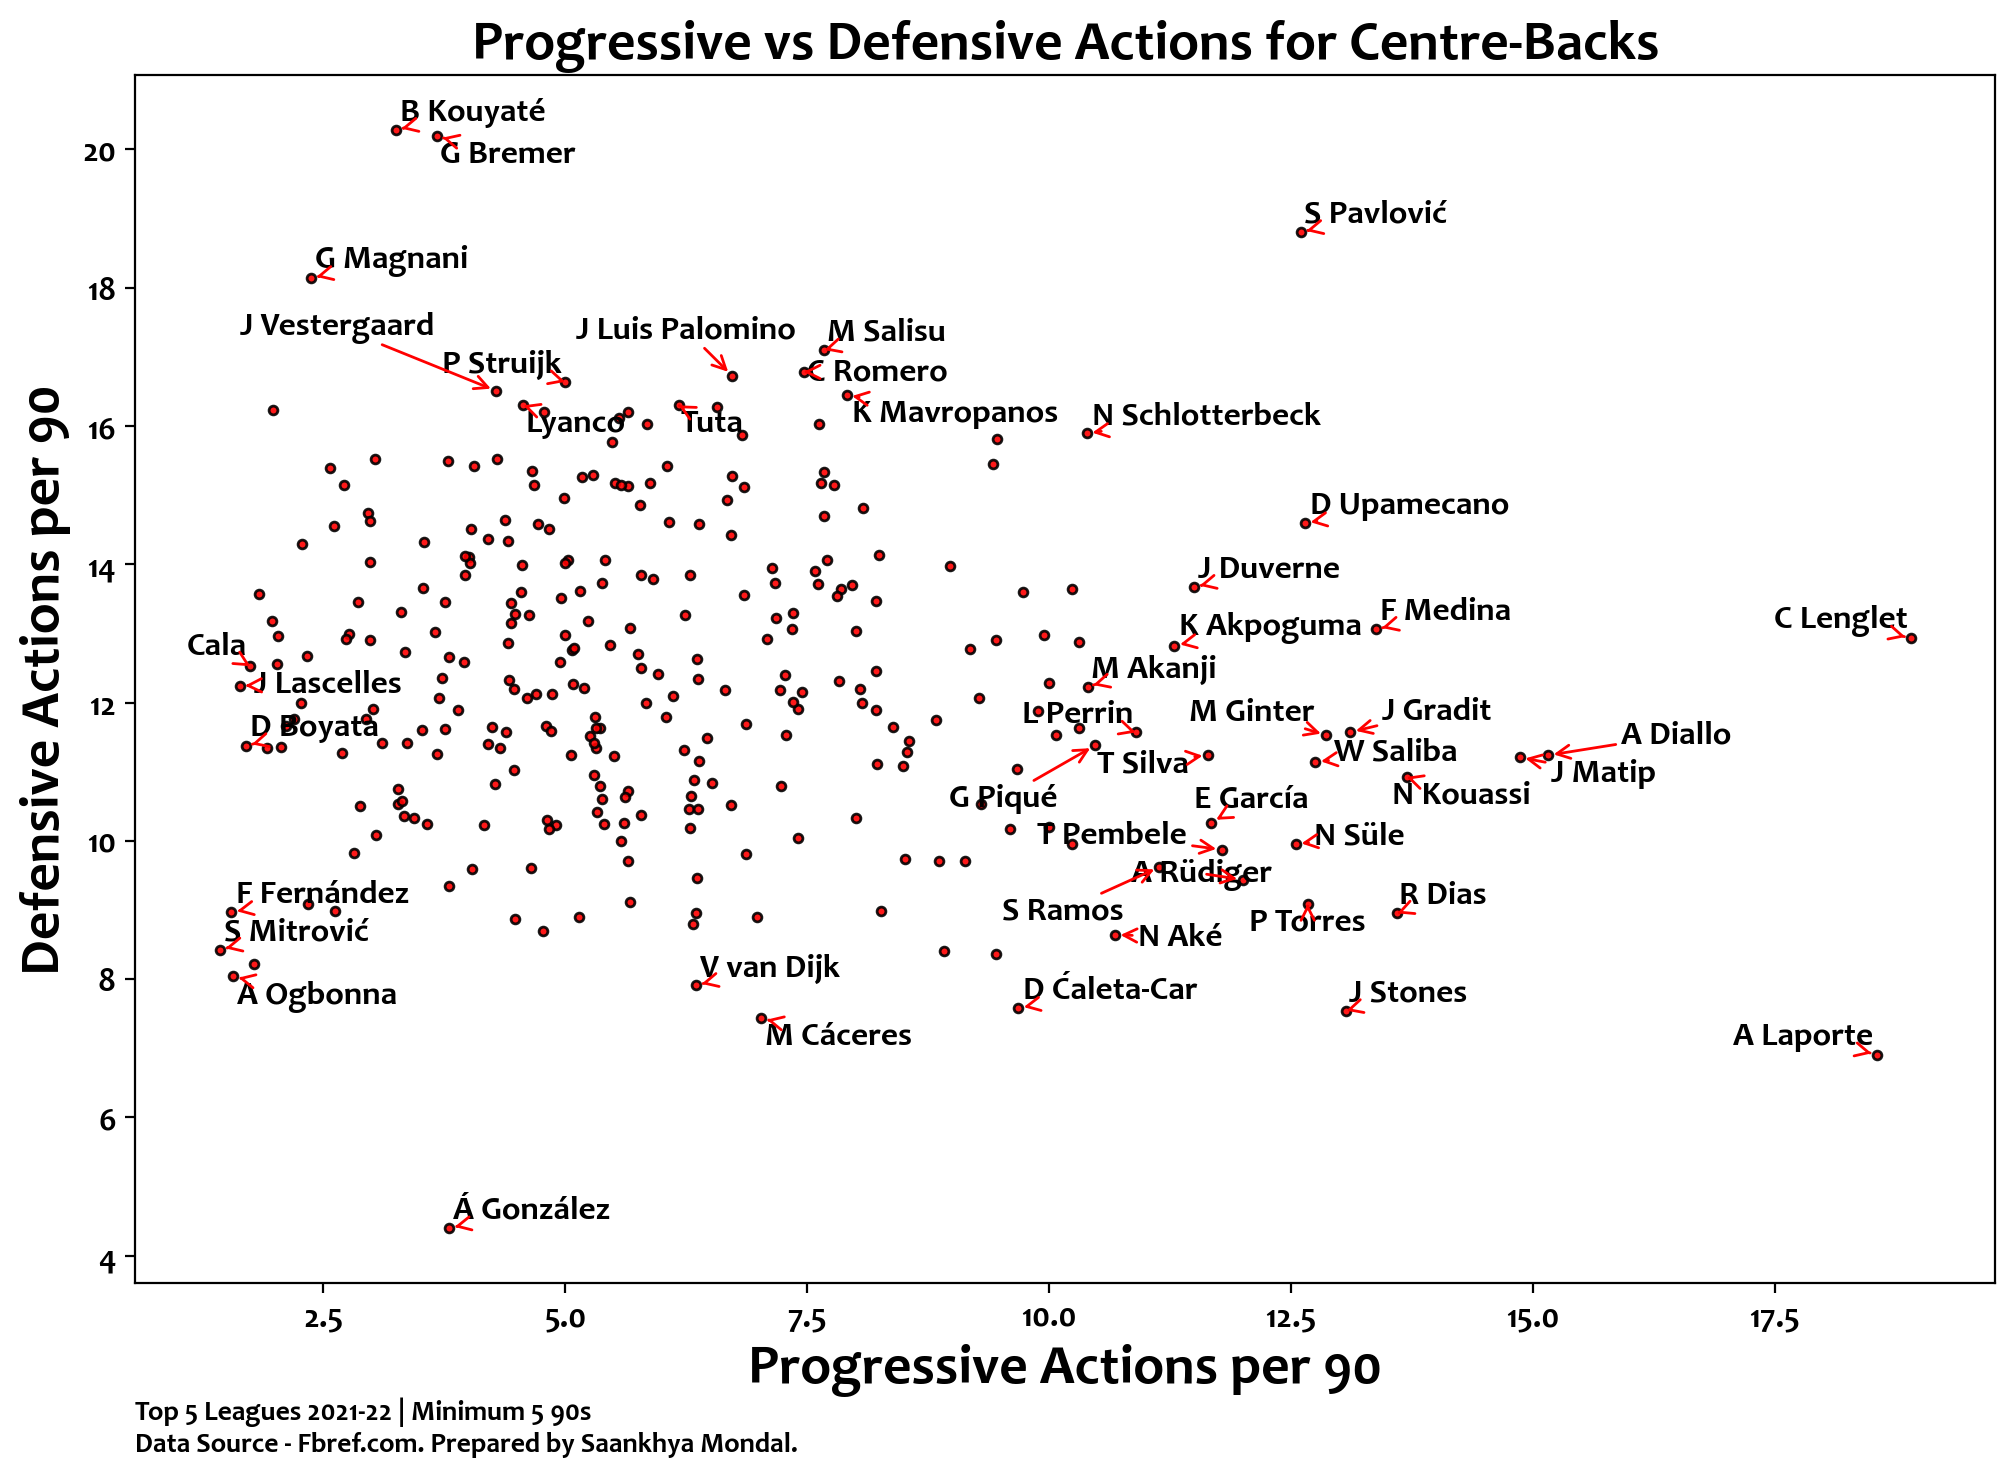

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')

outlier_top = data['DAp90'].astype(float).quantile(0.96)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.91)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Centre-Backs', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [17]:
fig.savefig('Images/PAp90vDAp90_CB.png', dpi=400, bbox_inches='tight')